In [44]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

# Définition du modèle

In [328]:
# Giordano et al. (2015)
e_M  = 3.6         # 1/h
k_R  = 3.6        # 1/h
K_R  = 1           # g/L
beta = 0.003       # L/g

# Yegorov et al. (2018)
k_X = 1            # 1/h
K_X = 1            # g/L
k_M = 4.32 #1.2*k_R
K_M = 33.33 #0.1/beta

K = beta*K_R
K_1 = beta*K_X
K_2 = beta*K_M
k_1 = k_X/k_R
k_2 = k_M/k_R

a=0.5
t0 = 0.0                   # initial time
tf = 40            # final time

Vmin = 0.005

s0 = 0.03
Eps = 0.06
V0= 0.02
p0 = ((Eps-s0)/V0) - 1             # p0 

R = -0.003
r0 = a - (R/V0)
print(r0)
rmin = r0*(V0/Eps)
rmax = 1-(1-r0)*(V0/Eps)

#définition des fonctions wM et wR
def wM(s, K):
    wm = k_2*s/(K+s)
    return wm

def wR(p, K):
    wm = p/(K+p)
    return wm

#définition du modèle

def model(etat, t, params):
    s, V = etat
    Eps, K, a, R = params
    s_dot = -wM(s, K_2)*(1-a+R/V)*V
    V_dot = wR(((Eps-s)/V)-1, K)*(a-R/V)*V
    return [s_dot, V_dot]

#mise en place des paramètres du modèle et de l'état initial

params_SV = np.array([Eps, K, a, R])
etat0_SV = np.array([s0, V0])

#définition du temps 

t_0 = 0.0
t_fin = 40
pas_t = 0.1
tspan = np.arange(t_0, t_fin, pas_t)

int_PH = odeint(model, etat0_SV, tspan, args=(params_SV,), hmax=pas_t)

s0_2 = 0.04
V0_2= 0.008
p0_2 = ((Eps-s0_2)/V0_2) - 1  
r0_2 = a - (R/V0_2)
params_SV_2 = np.array([Eps, K, a, R])
etat0_SV_2 = np.array([s0_2, V0_2])
int_PH2 = odeint(model, etat0_SV_2, tspan, args=(params_SV_2,), hmax=pas_t)

0.65


# Plan de phase

Text(0, 0.5, 'V')

/net/home/p/ps707218/.conda/envs/ct-gallery/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/net/home/p/ps707218/.conda/envs/ct-gallery/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


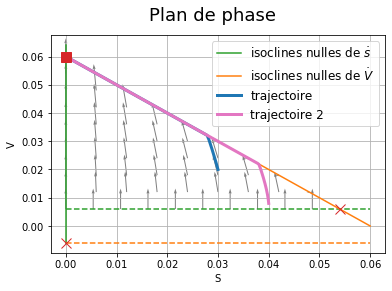

In [387]:
fig4, ax4 = plt.subplots()

# titre de la figure
fig4.suptitle("Plan de phase", va='top', fontsize='18')

splot = np.arange(0, Eps+(R/(1-a))+0.01, .01)

Vplot = np.arange(min(R/a, -R/(1-a)), Eps+0.01, .01)

# isoclines nulles de pdot
null_s_s = np.zeros_like(Vplot) 
null_s_V = (-R/(1-a))*np.ones_like(splot)

# #isoclines nulles de hdot
null_V_V = np.ones_like(splot)*((R/a))       
null_V_s = np.ones_like(splot)*(Eps-splot)     

# # isoclines nulles de p
ax4.plot(null_s_s, Vplot, color = 'C2', label = "isoclines nulles de $\dot s$")
ax4.plot(splot, null_s_V , '--', color = 'C2')
# # isoclines nulles de h
ax4.plot(splot, null_V_V,  '--', color = 'C1')
ax4.plot(null_V_s, splot, color = 'C1', label = "isoclines nulles de $\dot V$")

# trajectoire
ax4.plot(int_PH[:, 0], int_PH[:, 1], color = 'C0', linewidth = 3, label = "trajectoire")
ax4.plot(int_PH2[:, 0], int_PH2[:, 1], color = 'C6', linewidth = 3, label = "trajectoire 2")
ax4.grid()
# équilibres

eq_1 = [0, R/a]
eq_2 = [Eps+(R/(1-a)),-R/(1-a)]
eq_3 = [0, Eps]

ax4.plot(eq_1[0], eq_1[1], marker ='x', color = 'C3', markersize = 10)
ax4.plot(eq_2[0], eq_2[1], marker ='x', color = 'C3', markersize = 10)
ax4.plot(eq_3[0], eq_3[1], marker ='s', color = 'C3', markersize = 10) 

V_grid = np.linspace(max(R/a, -R/(1-a)), Eps, 10)

for i in V_grid:
    s_grid = np.linspace(0,Eps-i,int(10*(Eps-i)/(Eps-V_grid[0]))+1)
    X,Y=np.meshgrid(s_grid,i)
    dx, dy = model([X, Y], 0, params_SV)
    
    ax4.quiver(X, Y, dx, dy, angles = 'xy', color = 'grey', width = .003)
    
# légende
ax4.legend(fontsize='14', loc = "best", prop={'size': 12})

# labellisation des axes
ax4.set_xlabel('S')
ax4.set_ylabel('V')